### 데이터 세트: 잠수함 레이더로 어뢰 탐지

---

#### Features
- 총 60종의 float 타입 데이터

#### Targets
- 어뢰 / 바위 여부를 이진 분류
> - M: 어뢰
> - R: 바위

In [1]:
import pandas as pd
import numpy as np

# 데이터 세트 불러오기
m_df = pd.read_csv('../../datasets/sonar data.csv')
m_df

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


### 데이터 전처리

In [2]:
# 데이터 세트 복사 후 컬럼명 변경
pre_m_df = m_df.copy()

pre_m_df.columns = [f'sonar{i + 1}' for i in range(61)]
pre_m_df.loc[:, 'target'] = pre_m_df.sonar61
pre_m_df = pre_m_df.drop(labels=['sonar61'], axis=1)
pre_m_df

,sonar1,sonar2,sonar3,sonar4,sonar5,sonar6,sonar7,sonar8,sonar9,sonar10,...,sonar52,sonar53,sonar54,sonar55,sonar56,sonar57,sonar58,sonar59,sonar60,target
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
# 데이터 세트 정보 확인
pre_m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sonar1   207 non-null    float64
 1   sonar2   207 non-null    float64
 2   sonar3   207 non-null    float64
 3   sonar4   207 non-null    float64
 4   sonar5   207 non-null    float64
 5   sonar6   207 non-null    float64
 6   sonar7   207 non-null    float64
 7   sonar8   207 non-null    float64
 8   sonar9   207 non-null    float64
 9   sonar10  207 non-null    float64
 10  sonar11  207 non-null    float64
 11  sonar12  207 non-null    float64
 12  sonar13  207 non-null    float64
 13  sonar14  207 non-null    float64
 14  sonar15  207 non-null    float64
 15  sonar16  207 non-null    float64
 16  sonar17  207 non-null    float64
 17  sonar18  207 non-null    float64
 18  sonar19  207 non-null    float64
 19  sonar20  207 non-null    float64
 20  sonar21  207 non-null    float64
 21  sonar22  207 non

In [4]:
# 결측치 검사
pre_m_df.isna().sum().sum()

0

In [5]:
# 중복 검사
pre_m_df.duplicated().sum()

0

In [6]:
# target 데이터 분포 출력
pre_m_df.target.value_counts()

target
M    111
R     96
Name: count, dtype: int64

<Axes: >

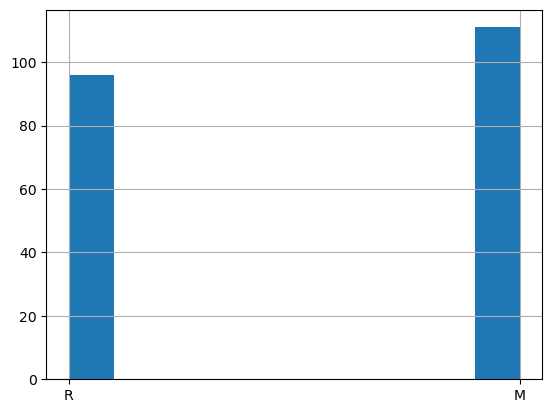

In [7]:
# target의 데이터 분포 시각화
pre_m_df.target.hist()

#### 레이블 인코딩
- target의 클래스가 2가지(R, M)이기 때문에 레이블 인코딩 실행

In [8]:
# target 클래스를 레이블 인코딩하는 함수
# R → 0, M → 1로 변환
def target_encoder(target):
    if target == 'R':
        return 0
    if target == 'M':
        return 1

In [9]:
# target에 레이블 인코딩 함수 적용
pre_m_df.loc[:, 'target'] = pre_m_df.target.apply(target_encoder)
pre_m_df

,sonar1,sonar2,sonar3,sonar4,sonar5,sonar6,sonar7,sonar8,sonar9,sonar10,...,sonar52,sonar53,sonar54,sonar55,sonar56,sonar57,sonar58,sonar59,sonar60,target
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [10]:
# target의 데이터 타입을 int로 변경
pre_m_df.target = pre_m_df.target.astype(np.int8)
pre_m_df.target.dtype

dtype('int8')

<Axes: >

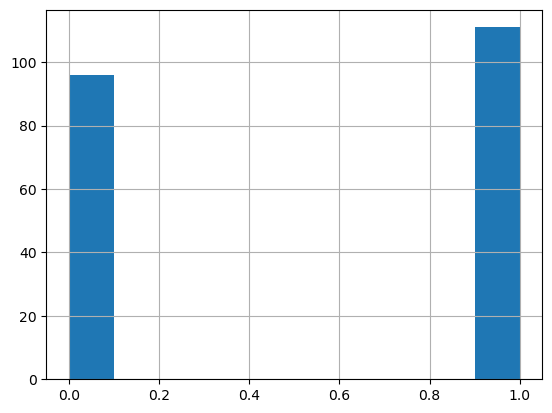

In [11]:
# target의 데이터 분포 시각화
pre_m_df.target.hist()

In [12]:
# target과 각 feature들의 상관관계 출력
pre_m_df.corr()['target'].sort_values(ascending=False)[1:]

sonar11    0.431452
sonar12    0.390331
sonar49    0.350441
sonar45    0.342801
sonar10    0.342199
sonar48    0.334199
sonar9     0.329180
sonar13    0.311948
sonar46    0.305624
sonar47    0.301527
sonar51    0.297358
sonar52    0.284528
sonar44    0.284527
sonar1     0.270482
sonar4     0.247935
sonar21    0.242818
sonar43    0.236109
sonar2     0.231670
sonar5     0.224809
sonar20    0.223143
sonar22    0.199643
sonar3     0.192589
sonar8     0.191424
sonar54    0.186932
sonar50    0.185623
sonar58    0.185066
sonar14    0.151116
sonar42    0.144705
sonar53    0.139288
sonar19    0.138648
sonar56    0.138112
sonar6     0.132172
sonar59    0.132088
sonar23    0.123539
sonar7     0.117848
sonar55    0.094392
sonar60    0.086982
sonar28    0.085259
sonar24    0.071733
sonar39    0.061572
sonar27    0.055324
sonar15    0.051240
sonar29    0.037543
sonar26    0.026867
sonar25    0.025284
sonar41    0.013833
sonar18    0.011635
sonar57    0.010152
sonar16    0.008246
sonar30   -0.000364


### 데이터 세트 분할
- target 클래스 별 데이터 수가 균일하지는 않지만, 그 차이가 크지 않기 때문에 SMOTE를 통한 오버 샘플링도 병행 

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 세트 분할
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 오버 샘플링
smote = SMOTE(random_state=124)

over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

In [14]:
# 훈련 데이터와 테스트 데이터를 각각 병합하여 새로운 데이터 세트 생성
train_df = pd.concat([over_X_train, over_y_train], axis=1).reset_index(drop=True)
test_df = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [15]:
# 훈련용, 테스트용 데이터 세트 확인
display(train_df)

,sonar1,sonar2,sonar3,sonar4,sonar5,sonar6,sonar7,sonar8,sonar9,sonar10,...,sonar52,sonar53,sonar54,sonar55,sonar56,sonar57,sonar58,sonar59,sonar60,target
0,0.053000,0.088500,0.199700,0.260400,0.322500,0.224700,0.061700,0.228700,0.095000,0.074000,...,0.024400,0.019900,0.025700,0.008200,0.015100,0.017100,0.014600,0.013400,0.005600,1
1,0.020900,0.027800,0.011500,0.044500,0.042700,0.076600,0.145800,0.143000,0.189400,0.185300,...,0.009600,0.001400,0.004900,0.003900,0.002900,0.007800,0.004700,0.002100,0.001100,1
2,0.028300,0.059900,0.065600,0.022900,0.083900,0.167300,0.115400,0.109800,0.137000,0.176700,...,0.014700,0.017000,0.015800,0.004600,0.007300,0.005400,0.003300,0.004500,0.007900,1
3,0.009600,0.040400,0.068200,0.068800,0.088700,0.093200,0.095500,0.214000,0.254600,0.295200,...,0.023700,0.007800,0.014400,0.017000,0.001200,0.010900,0.003600,0.004300,0.001800,1
4,0.033600,0.029400,0.047600,0.053900,0.079400,0.080400,0.113600,0.122800,0.123500,0.084200,...,0.015000,0.011100,0.003200,0.003500,0.016900,0.013700,0.001500,0.006900,0.005100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.020416,0.021674,0.023593,0.049378,0.066729,0.088197,0.091061,0.101228,0.075048,0.087581,...,0.006992,0.007459,0.008236,0.003909,0.008110,0.011904,0.008462,0.006165,0.007667,0
172,0.008936,0.024475,0.018995,0.029961,0.028986,0.109435,0.130731,0.068187,0.075346,0.133477,...,0.018901,0.008147,0.005095,0.007955,0.008177,0.006495,0.010451,0.005874,0.009893,0
173,0.018785,0.004574,0.061874,0.043753,0.032804,0.066669,0.089082,0.143297,0.074194,0.037702,...,0.009170,0.011606,0.011204,0.009055,0.013504,0.007002,0.002356,0.005433,0.011889,0
174,0.012074,0.017330,0.009000,0.015703,0.029563,0.040115,0.058479,0.030616,0.053788,0.078987,...,0.005785,0.006482,0.012655,0.008626,0.004530,0.008057,0.004782,0.006045,0.002146,0


In [16]:
display(test_df)

,sonar1,sonar2,sonar3,sonar4,sonar5,sonar6,sonar7,sonar8,sonar9,sonar10,...,sonar52,sonar53,sonar54,sonar55,sonar56,sonar57,sonar58,sonar59,sonar60,target
0,0.0211,0.0319,0.0415,0.0286,0.0121,0.0438,0.1299,0.1390,0.0695,0.0568,...,0.0090,0.0042,0.0153,0.0106,0.0020,0.0105,0.0049,0.0070,0.0080,0
1,0.0291,0.0400,0.0771,0.0809,0.0521,0.1051,0.0145,0.0674,0.1294,0.1146,...,0.0056,0.0237,0.0204,0.0050,0.0137,0.0164,0.0081,0.0139,0.0111,0
2,0.0664,0.0575,0.0842,0.0372,0.0458,0.0771,0.0771,0.1130,0.2353,0.1838,...,0.0141,0.0190,0.0043,0.0036,0.0026,0.0024,0.0162,0.0109,0.0079,0
3,0.0270,0.0163,0.0341,0.0247,0.0822,0.1256,0.1323,0.1584,0.2017,0.2122,...,0.0189,0.0204,0.0085,0.0043,0.0092,0.0138,0.0094,0.0105,0.0093,1
4,0.0526,0.0563,0.1219,0.1206,0.0246,0.1022,0.0539,0.0439,0.2291,0.1632,...,0.0339,0.0149,0.0335,0.0376,0.0174,0.0132,0.0103,0.0364,0.0208,1
5,0.0373,0.0281,0.0232,0.0225,0.0179,0.0733,0.0841,0.1031,0.0993,0.0802,...,0.0008,0.0045,0.0024,0.0006,0.0073,0.0096,0.0054,0.0085,0.0060,0
6,0.0201,0.0178,0.0274,0.0232,0.0724,0.0833,0.1232,0.1298,0.2085,0.2720,...,0.0131,0.0049,0.0104,0.0102,0.0092,0.0083,0.0020,0.0048,0.0036,1
7,0.0516,0.0944,0.0622,0.0415,0.0995,0.2431,0.1777,0.2018,0.2611,0.1294,...,0.0432,0.0274,0.0152,0.0120,0.0129,0.0020,0.0109,0.0074,0.0078,1
8,0.0056,0.0267,0.0221,0.0561,0.0936,0.1146,0.0706,0.0996,0.1673,0.1859,...,0.0072,0.0055,0.0074,0.0068,0.0084,0.0037,0.0024,0.0034,0.0007,1
9,0.0707,0.1252,0.1447,0.1644,0.1693,0.0844,0.0715,0.0947,0.1583,0.1247,...,0.0156,0.0197,0.0135,0.0127,0.0138,0.0133,0.0131,0.0154,0.0218,1


### 차원 축소
- 현재 feature 수가 많기 때문에 feature들 간의 다중 공선성, 데이터 희소화 등의 이슈가 발생할 수 있음
- 따라서 표현력 손실을 감수하더라도 위 문제를 해결하고, 연산 속도를 보완하기 위해 차원 축소 실행

#### 과정
- 축소 이후의 차원 수는 보존률이 0.7 이상이면서, 0.7에 가장 근접할 때의 수치로 선정
- PCA 방식으로 차원 축소해보고, LDA 방식으로도 시도해 본 다음 두 가지 방식의 결과 비교

#### PCA 방식으로 차원 축소

In [17]:
from sklearn.decomposition import PCA

# 1 ~ 15차원까지 늘려보면서 각 차원의 데이터 보존률 출력
# fit하기 적합한 차원 수를 알아보기 위함
for i in range(15):
    pca = PCA(n_components=(i + 1))

    pca_train = pca.fit_transform(over_X_train)
    pca_test = pca.transform(X_test)
    
    # 차원 축소 후 데이터 보존률 확인
    print(f'{i + 1}차원')
    print(pca.explained_variance_ratio_.sum())
    print('=' * 30)

1차원
0.3022836759425232
2차원
0.5072449399297103
3차원
0.5943645911521369
4차원
0.6587532850089217
5차원
0.7180110422867181
6차원
0.7649633088278318
7차원
0.8025145483116589
8차원
0.8297345320687968
9차원
0.8541860592526127
10차원
0.874617197510619
11차원
0.8905096910128736
12차원
0.9043810957128365
13차원
0.9168592793413736
14차원
0.9280874443615247
15차원
0.9376487490304368


##### 중간 분석
- 4차원으로 축소했을 때 가장 이상적인 보존률을 보임

In [18]:
from sklearn.decomposition import PCA

# 축소 후 차원을 2차원으로 조정 - 우선 산점도로 시각화하기 위함
pca = PCA(n_components=2)

# PCA 방식을 통해 기존 feature들을 2차원으로 축소
pca_train = pca.fit_transform(train_df.iloc[:, :-1])

# 차원 축소가 완료된 훈련용 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

In [19]:
# 2차원으로 축소한 이후의 데이터 세트 확인
pca_train_df

,pca1,pca2,target
0,0.914961,0.162534,1
1,0.765278,0.211490,1
2,0.950382,0.206422,1
3,-0.112328,-0.182396,1
4,0.979301,-0.539404,0
...,...,...,...
171,-0.937588,-0.217359,0
172,-0.632673,0.549225,0
173,-0.226487,-0.122741,0
174,-0.915459,0.120722,0


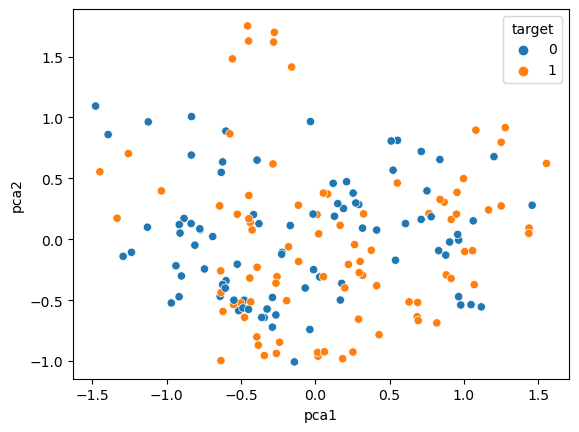

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 재 데이터 분포를 산점도로 시각화
sns.scatterplot(x="pca1", y="pca2", hue='target', data=pca_train_df)
plt.show()

##### 중간 분석
- 시각화 결과, PCA 방식을 통해 2차원으로 축소했을 때 target 클래스 간 영역을 구분하기 어려운 것을 확인

In [21]:
from sklearn.decomposition import PCA

# PCA 방식을 통해 feature들을 5차원으로 축소
pca = PCA(n_components=5)
pca_train = pca.fit_transform(train_df.iloc[:, :-1])
pca_test = pca.transform(test_df.iloc[:, :-1])

# 차원 축소가 완료된 데이터 세트 생성
pca_columns = [f'pca{i + 1}' for i in range(pca_train.shape[1])]
pca_train_df = pd.DataFrame(pca_train, columns=pca_columns)
pca_train_df.loc[:, 'target'] = train_df.target

pca_columns = [f'pca{i + 1}' for i in range(pca_test.shape[1])]
pca_test_df = pd.DataFrame(pca_test, columns=pca_columns)
pca_test_df.loc[:, 'target'] = test_df.target

In [22]:
# 차원 축소 결과 확인
print(pca_train.shape, pca_test.shape)

(176, 5) (42, 5)


In [23]:
# 차원 축소된 데이터 세트 확인
display(pca_train_df)

,pca1,pca2,pca3,pca4,pca5,target
0,0.914961,0.162534,-0.548940,-0.440459,0.190513,1
1,0.765278,0.211490,-0.080102,-0.509702,-0.153084,1
2,0.950382,0.206422,-0.320634,-0.152154,0.049854,1
3,-0.112328,-0.182396,-0.116027,0.588126,0.732885,1
4,0.979301,-0.539404,-0.304840,-0.058315,-0.305540,0
...,...,...,...,...,...,...
171,-0.937588,-0.217359,-0.201473,-0.238263,-0.306140,0
172,-0.632673,0.549225,-0.582718,0.527143,-0.442097,0
173,-0.226487,-0.122741,-0.487507,-0.398583,-0.037071,0
174,-0.915459,0.120722,0.140660,0.169882,-0.511090,0


In [24]:
display(pca_test_df)

,pca1,pca2,pca3,pca4,pca5,target
0,-0.958792,0.483057,-0.578654,0.284305,-0.497131,0
1,-0.783362,0.591395,0.629651,-0.178061,-0.121918,0
2,-0.644504,1.612466,0.146988,0.290276,-0.149640,0
3,0.653892,-0.615614,-0.126359,0.168316,0.018636,1
4,-0.839293,0.238144,-0.082843,0.303594,0.009557,1
5,-0.547659,0.374853,-0.512595,-0.439670,0.073136,0
6,-1.463861,0.459194,-0.050428,0.344417,0.085703,1
7,-0.823985,0.241031,-0.037443,0.523613,-0.048766,1
8,-0.441291,-0.663436,0.497196,0.018141,0.110198,1
9,-0.256396,0.071647,0.025107,0.612268,-0.007963,1


In [25]:
# 기존 데이터에 대한 보존률 확인 - 현재 약 78% 보존됨
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.30228368 0.20496126 0.08711965 0.06438869 0.05925776]
0.7180110422867181


#### Pytorch를 이용한 로지스틱 회귀

In [26]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split
import numpy as np

# torch의 시드값 고정
torch.manual_seed(124)

# 데이터 세트 분할 후 Tensor 타입으로 변경
# y(정답) 데이터 세트들은 ndarray 타입이기 때문에 view를 사용해서 차원 변환
X_train = torch.FloatTensor(pca_train_df.iloc[:, :-1].values)
y_train = torch.FloatTensor(pca_train_df.target.values).view(-1, 1)
X_test = torch.FloatTensor(pca_test_df.iloc[:, :-1].values)
y_test = torch.FloatTensor(pca_test_df.target.values).view(-1, 1)

# Linear(5차원) → Sigmoid 순서의 층 선언
logistic_r = Sequential(
    Linear(5, 1),
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=0.005)

# 반복 횟수
epochs = 200000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item(), 4)}')
        print(f'loss: {np.round(loss.item(), 4)}')
        print('=' * 60)

Epoch: 10000/200000
W1: 0.5355, W2: -0.0718, W3: 0.2341, W4: 1.0046, W5: 2.1967, b: 0.0038
loss: 0.5507
Epoch: 20000/200000
W1: 0.5935, W2: -0.0718, W3: 0.2267, W4: 1.4112, W5: 3.1408, b: 0.0183
loss: 0.5286
Epoch: 30000/200000
W1: 0.6285, W2: -0.0616, W3: 0.2268, W4: 1.6175, W5: 3.6463, b: 0.0291
loss: 0.5224
Epoch: 40000/200000
W1: 0.6505, W2: -0.0526, W3: 0.2274, W4: 1.7342, W5: 3.9434, b: 0.0361
loss: 0.5204
Epoch: 50000/200000
W1: 0.6644, W2: -0.046, W3: 0.228, W4: 1.8041, W5: 4.1264, b: 0.0407
loss: 0.5196
Epoch: 60000/200000
W1: 0.6734, W2: -0.0415, W3: 0.2283, W4: 1.8474, W5: 4.2421, b: 0.0437
loss: 0.5193
Epoch: 70000/200000
W1: 0.6793, W2: -0.0384, W3: 0.2285, W4: 1.8748, W5: 4.3165, b: 0.0456
loss: 0.5191
Epoch: 80000/200000
W1: 0.6831, W2: -0.0364, W3: 0.2287, W4: 1.8924, W5: 4.3645, b: 0.0469
loss: 0.5191
Epoch: 90000/200000
W1: 0.6856, W2: -0.035, W3: 0.2288, W4: 1.9038, W5: 4.3959, b: 0.0478
loss: 0.519
Epoch: 100000/200000
W1: 0.6872, W2: -0.0341, W3: 0.2288, W4: 1.9112

##### 중간 분석
- 약 160000번째 Epoch 이전 시점에서 W, b와 loss가 더 이상 변하지 않는 것을 확인

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# 분류 모델의 평가 지표를 출력하고, 분류기와 문제(X_test)를 전달받으면 오차 행렬도 시각화 해주는 함수
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
    confusion = confusion_matrix(y_test, prediction)
    accuracy = accuracy_score(y_test , prediction)
    precision = precision_score(y_test , prediction, average='macro')
    recall = recall_score(y_test , prediction, average='macro')
    f1 = f1_score(y_test, prediction, average='macro')
    auc = roc_auc_score(y_test, prediction, average='macro')
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, ROC-AUC: {4:.4f}'.format(accuracy, precision, recall, f1, auc))
    print("#" * 80)
    
    if classifier is not None and X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

In [28]:
# 모델 평가
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[16  3]
 [ 6 17]]
정확도: 0.7857, 정밀도: 0.7886, 재현율: 0.7906, F1: 0.7856, ROC-AUC: 0.7906
################################################################################


#### Sklearn의 LogisticRegression을 이용한 로지스틱 회귀

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분할
X_train, y_train = pca_train_df.iloc[:, :-1], pca_train_df.target
X_test, y_test = pca_test_df.iloc[:, :-1], pca_test_df.target

# 일반적으로 데이터 세트가 작은 경우에는 liblinear가, 큰 경우에는 sag, saga의 성능이 더 좋다
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
# C값이 작아질수록 규제가 커진다
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=1, random_state=124)
logistic_r.fit(X_train, y_train)

# 훈련 후 테스트 데이터 예측
prediction = logistic_r.predict(X_test)

오차 행렬
[[17  2]
 [ 8 15]]
정확도: 0.7619, 정밀도: 0.7812, 재현율: 0.7735, F1: 0.7614, ROC-AUC: 0.7735
################################################################################


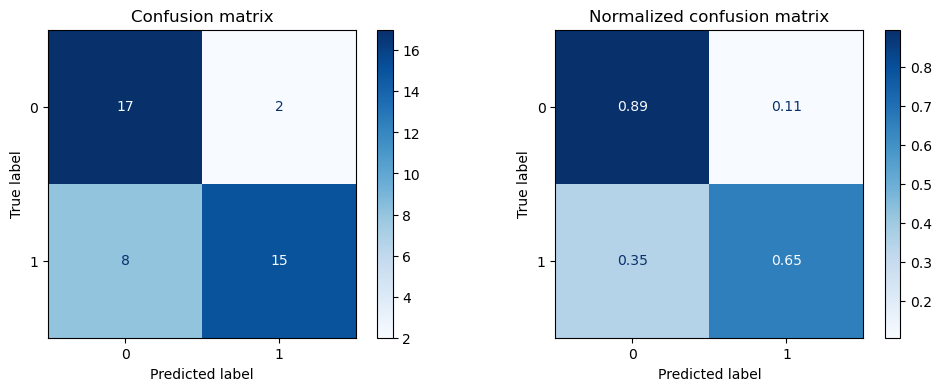

In [30]:
# 모델 평가
get_evaluation(y_test, prediction, logistic_r, X_test)

##### PCA 방식의 차원 축소 후 로지스틱 회귀 결과
- 전반적인 평가 지표가 약 0.78 정도로 측정
- 다만 0(바위)을 예측하는 경향이 강하기 때문에 LDA 차원 축소 결과 보고 임계치 조정

#### LDA 방식으로 차원 축소
- 현재 target의 클래스는 2가지
- LDA 방식으로 차원 축소 할 경우, 축소 이후의 차원 수는 target 클래스 수 - 1이 최대이므로,  
  현재 데이터 세트는 1차원으로의 축소밖에 불가능함

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# LDA 방식으로 데이터 세트 차원 축소
lda = LinearDiscriminantAnalysis(n_components=1)

# LDA로 fit할 때는 target 데이터를 같이 넣어준다
lda_train = lda.fit_transform(train_df.iloc[:, :-1], train_df.iloc[:, -1])
lda_test = lda.transform(test_df.iloc[:, :-1])

# 차원 축소 후 결과 확인
print(lda_train.shape, lda_test.shape)

(176, 1) (42, 1)


In [32]:
# 차원 축소된 데이터 세트 생성
lda_columns = [f'lda{i + 1}' for i in range(lda_train.shape[1])]
lda_train_df = pd.DataFrame(lda_train, columns=lda_columns)
lda_train_df.loc[:, 'target'] = train_df['target']

lda_columns = [f'lda{i + 1}' for i in range(lda_test.shape[1])]
lda_test_df = pd.DataFrame(lda_test, columns=lda_columns)
lda_test_df.loc[:, 'target'] = test_df['target']

In [33]:
# 데이터 세트 확인
display(lda_train_df)
display(lda_test_df)

,lda1,target
0,2.379179,1
1,-0.103559,1
2,-0.446794,1
3,2.421327,1
4,-1.977774,0
...,...,...
171,-1.414653,0
172,-2.224877,0
173,-1.582461,0
174,-2.735430,0


,lda1,target
0,-5.467698,0
1,-2.376068,0
2,1.028642,0
3,0.518087,1
4,5.959139,1
5,1.718139,0
6,0.648439,1
7,3.007558,1
8,2.291556,1
9,4.176500,1


In [34]:
# 기존 데이터에 대한 보존률 확인 - 기존 데이터가 완전히 보존됨
print(lda.explained_variance_ratio_)
print(lda.explained_variance_ratio_.sum())

[1.]
1.0


#### Pytorch를 이용한 로지스틱 회귀

In [35]:
import torch
from torch.nn import Sequential, Linear, Sigmoid
from torch.optim import SGD
from torch.nn.functional import binary_cross_entropy
from sklearn.model_selection import train_test_split
import numpy as np

# torch의 시드값 고정
torch.manual_seed(124)

# 데이터 세트 분할 후 Tensor 타입으로 변경
# y(정답) 데이터 세트들은 ndarray 타입이기 때문에 view를 사용해서 차원 변환
X_train = torch.FloatTensor(lda_train_df.iloc[:, :-1].values)
y_train = torch.FloatTensor(lda_train_df.target.values).view(-1, 1)
X_test = torch.FloatTensor(lda_test_df.iloc[:, :-1].values)
y_test = torch.FloatTensor(lda_test_df.target.values).view(-1, 1)

# Linear(1차원) → Sigmoid 순서의 층 선언
logistic_r = Sequential(
    Linear(1, 1),
    Sigmoid(),
)

optimizer = SGD(logistic_r.parameters(), lr=0.005)

# 반복 횟수
epochs = 300000

for epoch in range(1, epochs + 1):
    H = logistic_r(X_train)
    loss = binary_cross_entropy(H, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10000 == 0:
        print(f'Epoch: {epoch}/{epochs}')
        for i, w in enumerate(list(logistic_r.parameters())[0][0]):
            print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
        print(f'b: {np.round(list(logistic_r.parameters())[1].item(), 4)}')
        print(f'loss: {np.round(loss.item(), 4)}')
        print('=' * 60)

Epoch: 10000/300000
W1: 2.792, b: 0.054
loss: 0.1595
Epoch: 20000/300000
W1: 3.201, b: 0.0741
loss: 0.1559
Epoch: 30000/300000
W1: 3.382, b: 0.0851
loss: 0.1552
Epoch: 40000/300000
W1: 3.4747, b: 0.091
loss: 0.155
Epoch: 50000/300000
W1: 3.525, b: 0.0943
loss: 0.155
Epoch: 60000/300000
W1: 3.5531, b: 0.0961
loss: 0.155
Epoch: 70000/300000
W1: 3.5689, b: 0.0972
loss: 0.155
Epoch: 80000/300000
W1: 3.578, b: 0.0977
loss: 0.155
Epoch: 90000/300000
W1: 3.5833, b: 0.0981
loss: 0.155
Epoch: 100000/300000
W1: 3.586, b: 0.0983
loss: 0.155
Epoch: 110000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 120000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 130000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 140000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 150000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 160000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 170000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 180000/300000
W1: 3.5882, b: 0.0984
loss: 0.155
Epoch: 190000/300000
W1:

##### 중간 분석
- 약 110000번째 Epoch 이전 시점에서 W, b와 loss가 더 이상 변하지 않는 것을 확인

In [36]:
# 모델 평가
get_evaluation(y_test.detach(), logistic_r(X_test) >= 0.5)

오차 행렬
[[14  5]
 [ 5 18]]
정확도: 0.7619, 정밀도: 0.7597, 재현율: 0.7597, F1: 0.7597, ROC-AUC: 0.7597
################################################################################


#### Sklearn의 LogisticRegression을 이용한 로지스틱 회귀

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분할
X_train, y_train = lda_train_df.iloc[:, :-1], lda_train_df.target
X_test, y_test = lda_test_df.iloc[:, :-1], lda_test_df.target

# 일반적으로 데이터 세트가 작은 경우에는 liblinear가, 큰 경우에는 sag, saga의 성능이 더 좋다
# 다중 분류는 'newton-cg', 'sag', 'saga', 'lbfgs'만 처리할 수 있다.
# C값이 작아질수록 규제가 커진다
logistic_r = LogisticRegression(solver='liblinear', penalty='l2', C=0.0001, random_state=124)
logistic_r.fit(X_train, y_train)

# 훈련 후 테스트 데이터 예측
prediction = logistic_r.predict(X_test)

오차 행렬
[[15  4]
 [ 5 18]]
정확도: 0.7857, 정밀도: 0.7841, 재현율: 0.7860, F1: 0.7846, ROC-AUC: 0.7860
################################################################################


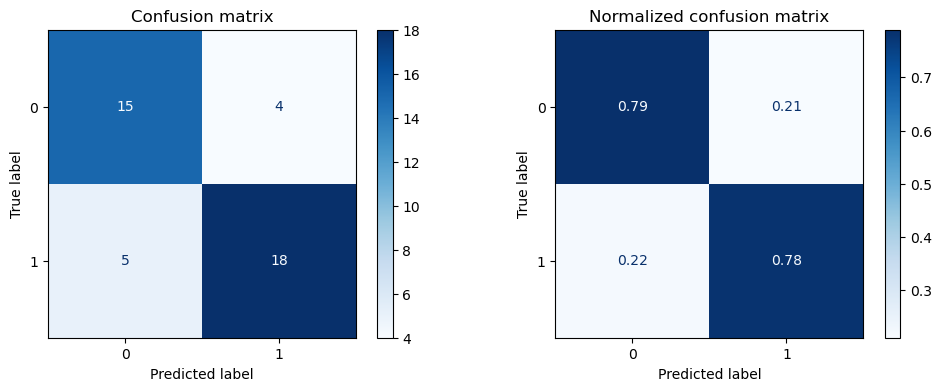

In [38]:
# 모델 평가
get_evaluation(y_test, prediction, logistic_r, X_test)

##### LDA 방식의 차원 축소 후 로지스틱 회귀 결과
- 전반적인 평가 지표가 0.78 정도로 PCA와 비슷한 양상을 보임
- 본 모델은 지뢰(1)을 예측하는 것에 초점을 두고 싶기 때문에 재현율을 0.83 이상으로 향상시키는 것이 이상적이라고 판단,  
  따라서 trade-off 시각화하고 임계치 조정해서 다시 학습

#### LDA 파이프라인 구축
- LogisticRegression 파라미터
> - solver: liblinear, saga
>> l1 또는 l2 Penalty를 적용할 수 있는 알고리즘으로 선정
> - penalty: l1, l2
> - C: 0.5, 0.1, 0.05, 0.01, 0.005, 0.001

- 파이프라인 순서
> - LDA
> - LogisticRegression

- 모든 feature들에 MinMaxScaler가 적용되어 있기 때문에 추가적인 스케일링은 생략

In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# 데이터 세트 분할
features, targets = pre_m_df.iloc[:, :-1], pre_m_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.2, random_state=124)

# 오버 샘플링
smote = SMOTE(random_state=124)

over_X_train, over_y_train = smote.fit_resample(X_train, y_train)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import FeatureUnion

# 로지스틱 회귀 모델 객체 선언
lgr = LogisticRegression(random_state=124)


# 교차 검증에 사용할 하이퍼 파라미터
parameters = {'lgr__solver': ['liblinear', 'saga'],
              'lgr__penalty': ['l1', 'l2'],
              'lgr__C': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001]}

# FeatureUnion 사용한 파이프라인 구성 - 차원 축소 이전의 feature명을 Pipeline에 전달하는 용도
lda_pipe = FeatureUnion([
    ("lda", LinearDiscriminantAnalysis(n_components=1)),
    ("passthrough", 'passthrough')])

# LDA와 LogisticRegression을 거치는 파이프라인 구축
lgr_pipe = Pipeline([('lda_pipe', lda_pipe),
                     ('lgr', lgr)])

# 위의 파이프라인으로 훈련 데이터 교차 검증
g_lgr = GridSearchCV(lgr_pipe, param_grid=parameters, cv=3, scoring='accuracy')
g_lgr.fit(over_X_train, over_y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('lda_pipe',
                                        FeatureUnion(transformer_list=[('lda',
                                                                        LinearDiscriminantAnalysis(n_components=1)),
                                                                       ('passthrough',
                                                                        'passthrough')])),
                                       ('lgr',
                                        LogisticRegression(random_state=124))]),
             param_grid={'lgr__C': [0.5, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'lgr__penalty': ['l1', 'l2'],
                         'lgr__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [41]:
# 각 하이퍼 파라미터 별 평가 점수를 데이터 세트 형식으로 출력
result_df = pd.DataFrame(g_lgr.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'lgr__C': 0.5, 'lgr__penalty': 'l1', 'lgr__so...",0.733197,3
1,"{'lgr__C': 0.5, 'lgr__penalty': 'l1', 'lgr__so...",0.721800,20
2,"{'lgr__C': 0.5, 'lgr__penalty': 'l2', 'lgr__so...",0.727547,10
3,"{'lgr__C': 0.5, 'lgr__penalty': 'l2', 'lgr__so...",0.727547,10
4,"{'lgr__C': 0.1, 'lgr__penalty': 'l1', 'lgr__so...",0.733197,3
5,"{'lgr__C': 0.1, 'lgr__penalty': 'l1', 'lgr__so...",0.727547,10
6,"{'lgr__C': 0.1, 'lgr__penalty': 'l2', 'lgr__so...",0.727547,10
7,"{'lgr__C': 0.1, 'lgr__penalty': 'l2', 'lgr__so...",0.727547,10
8,"{'lgr__C': 0.05, 'lgr__penalty': 'l1', 'lgr__s...",0.733197,3
9,"{'lgr__C': 0.05, 'lgr__penalty': 'l1', 'lgr__s...",0.727547,10


In [42]:
for params in result_df[result_df['rank_test_score'] == 1]['params']:
    print(params)

{'lgr__C': 0.005, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear'}


In [43]:
# 최적의 하이퍼 파라미터로 튜닝
lgr = g_lgr.best_estimator_
lgr.fit(over_X_train, over_y_train)

Pipeline(steps=[('lda_pipe',
                 FeatureUnion(transformer_list=[('lda',
                                                 LinearDiscriminantAnalysis(n_components=1)),
                                                ('passthrough',
                                                 FunctionTransformer(feature_names_out='one-to-one'))])),
                ('lgr',
                 LogisticRegression(C=0.005, random_state=124,
                                    solver='liblinear'))])

오차 행렬
[[14  5]
 [ 4 19]]
정확도: 0.7857, 정밀도: 0.7847, 재현율: 0.7815, F1: 0.7826, ROC-AUC: 0.7815
################################################################################


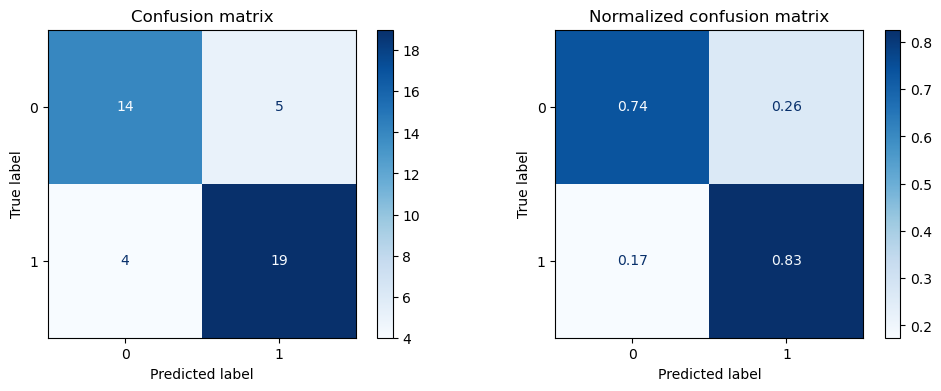

In [44]:
# 테스트 데이터 예측
prediction = lgr.predict(X_test)

# 테스트 데이터의 예측을 평가
get_evaluation(y_test, prediction, lgr, X_test)

In [45]:
from sklearn.metrics import roc_curve

# ROC Curve를 시각화해주는 함수
def roc_curve_plot(y_test , proba_class1):
#     임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, proba_class1)

#     ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
#     가운데 대각선 직선을 그림. 
#     TPR과 FPR이 동일한 비율로 떨어진다는 것은 모델이 양성과 음성을 구별하지 못한다는 것을 의미한다.
#     다른 분류기를 판단하기 위한 기준선으로 사용되며, 
#     대각선에 가까울 수록 예측에 사용하기 힘든 모델이라는 뜻이다.
    plt.plot([0, 1], [0, 1], 'k--', label='Standard')
    
    # X축(FPR)의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()

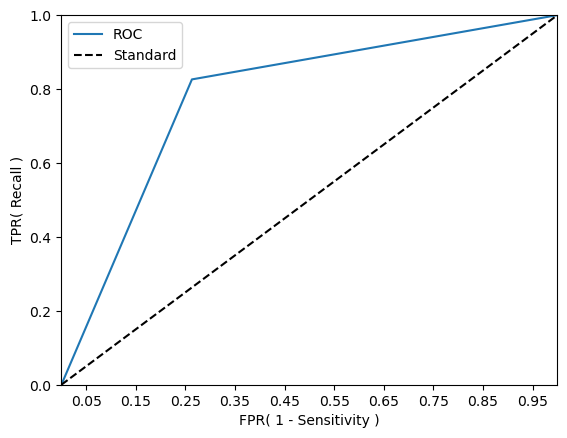

In [46]:
# ROC Curve 시각화 
roc_curve_plot(y_test, prediction)

#### 임계치 조정
- 재현율이 0.83 이상이 되도록 임계치 낮추기

In [47]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve

# 정밀도와 재현율의 Trade-off응 시각화해주는 함수
def precision_recall_curve_plot(y_test , prediction_proba_class1):

    precisions, recalls, thresholds = precision_recall_curve(y_test, prediction_proba_class1)
    
    # X축: threshold
    # Y축: 정밀도, 재현율 
    # 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # X축(threshold)의 Scale을 0 ~ 1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()
    plt.show()

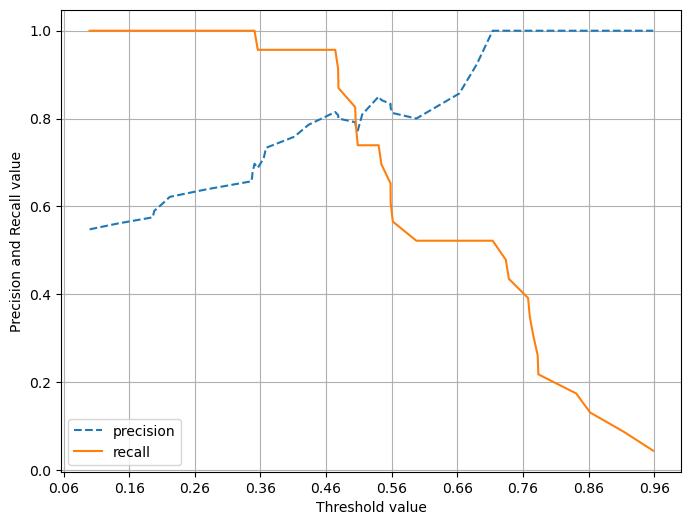

In [48]:
# 현재 모델의 Trade-off 시각화
precision_recall_curve_plot(y_test, lgr.predict_proba(X_test)[:, 1])

In [49]:
# 정밀도 / 재현율이 변하는 지점의 임계치를 전부 출력
_, _, thresholds = precision_recall_curve(y_test, lgr.predict_proba(X_test)[:, 1])
thresholds

array([0.09969292, 0.14264595, 0.19590273, 0.19824396, 0.21011882,
       0.22186017, 0.27812745, 0.34652355, 0.34794355, 0.35092936,
       0.35591219, 0.36497808, 0.36851471, 0.41159192, 0.43319169,
       0.47393412, 0.47829008, 0.47883592, 0.50428862, 0.50539985,
       0.50825366, 0.51508709, 0.54004008, 0.54426636, 0.55819244,
       0.55833031, 0.5616777 , 0.5974733 , 0.6629655 , 0.68933131,
       0.7137349 , 0.73377646, 0.73849628, 0.76770367, 0.77035375,
       0.77582256, 0.78228621, 0.78339163, 0.84101407, 0.86223036,
       0.91314473, 0.95832508])

In [50]:
from sklearn.preprocessing import Binarizer

# 전달받은 임계치 list(thresholds) 내 각각의 임계치에 따른 모델의 평가 지표 출력
def get_evaluation_by_thresholds(y_test, prediction_proba_class1, thresholds):
    for threshold in thresholds:
        binarizer = Binarizer(threshold=threshold).fit(prediction_proba_class1) 
        custom_prediction = binarizer.transform(prediction_proba_class1)
        print('임계치:', threshold)
        get_evaluation(y_test, custom_prediction)

In [51]:
# 재현율을 향상시키는 것이 목적이므로, 위의 임계치들 중 0.5 미만인 값만 담은 list 선언 
recall_thresholds = [i for i in thresholds if i < 0.5]

recall_thresholds

[0.09969291964848344,
 0.14264595251529782,
 0.19590273277526565,
 0.19824395903310119,
 0.21011882472159996,
 0.22186016799695116,
 0.27812745460156035,
 0.346523552518596,
 0.3479435543917625,
 0.35092935633578387,
 0.3559121918598814,
 0.36497808353790245,
 0.3685147128214889,
 0.4115919163183634,
 0.43319168725039814,
 0.47393412341961655,
 0.4782900838518148,
 0.4788359175683194]

In [52]:
# 0.5 미만의 임계치에 따른 평가 지표 출력
get_evaluation_by_thresholds(y_test, lgr.predict_proba(X_test)[:, 1].reshape(-1, 1), recall_thresholds)

임계치: 0.09969291964848344
오차 행렬
[[ 1 18]
 [ 0 23]]
정확도: 0.5714, 정밀도: 0.7805, 재현율: 0.5263, F1: 0.4094, ROC-AUC: 0.5263
################################################################################
임계치: 0.14264595251529782
오차 행렬
[[ 2 17]
 [ 0 23]]
정확도: 0.5952, 정밀도: 0.7875, 재현율: 0.5526, F1: 0.4603, ROC-AUC: 0.5526
################################################################################
임계치: 0.19590273277526565
오차 행렬
[[ 3 16]
 [ 0 23]]
정확도: 0.6190, 정밀도: 0.7949, 재현율: 0.5789, F1: 0.5073, ROC-AUC: 0.5789
################################################################################
임계치: 0.19824395903310119
오차 행렬
[[ 4 15]
 [ 0 23]]
정확도: 0.6429, 정밀도: 0.8026, 재현율: 0.6053, F1: 0.5510, ROC-AUC: 0.6053
################################################################################
임계치: 0.21011882472159996
오차 행렬
[[ 5 14]
 [ 0 23]]
정확도: 0.6667, 정밀도: 0.8108, 재현율: 0.6316, F1: 0.5917, ROC-AUC: 0.6316
################################################################################
임계치: 0.221

In [53]:
# 임계치 조정 후 다시 예측
binarizer = Binarizer(threshold=0.4782)
recall_prediction = binarizer.fit_transform(lgr.predict_proba(X_test)[:, 1].reshape(-1, 1))

오차 행렬
[[14  5]
 [ 2 21]]
정확도: 0.8333, 정밀도: 0.8413, 재현율: 0.8249, F1: 0.8286, ROC-AUC: 0.8249
################################################################################


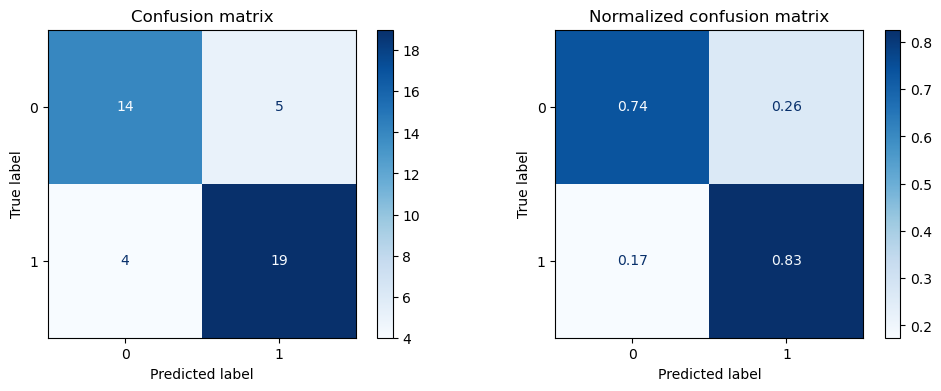

In [54]:
# 테스트 데이터 예측
prediction = lgr.predict(X_test)

# 테스트 데이터의 예측을 평가
get_evaluation(y_test, recall_prediction, lgr, X_test)

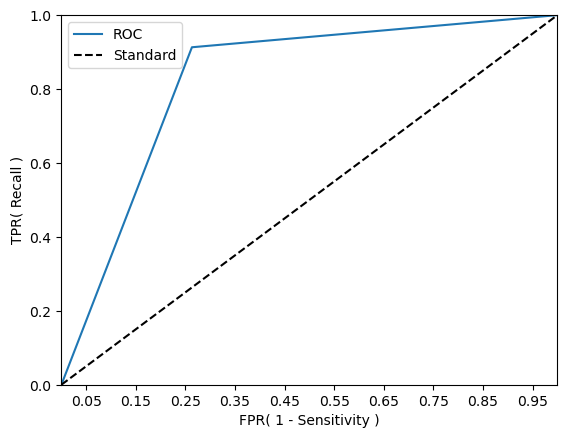

In [55]:
# ROC Curve 시각화 
roc_curve_plot(y_test, recall_prediction)

#### 학습 결과
- 임계치를 낮춘 결과, 목표였던 0.8 이상의 재현율을 가진 로지스틱 회귀 모델을 얻을 수 있었다.
- 이 과정에서 사용한 차원 축소 방식인 LDA는 입력으로 받은 데이터를  
  최대한 클래스 별로 구분할 수 있는 방법을 찾는 방식이기 때문에 이번과 같은 분류 모델 프로젝트에 적합했다.
- 또한 LinearRegression 모델 객체를 사용할 때 penalty와 C 파라미터를 통해 규제를 걸었으며,  
  최적의 하이퍼 파라미터 값을 GridSearchCV를 통해 찾아서 적용시켰기 때문에 모델의 복잡도를 낮추는 방법으로 과적합도 해소했다.